<a href="https://colab.research.google.com/github/a1ire3a/Action-Recognition/blob/main/ActionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

in this block, load recommended library.

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/action.npy'
data = np.load(path)

load dataset from google drive

In [4]:
print(data.shape)

(4016, 48)


In [ ]:
temp = []
D = []
L = []
nv = 1
min = 1000
max = -1

for i in range(4016):
    t = data[i]
    if t[0] == nv:
        temp.append(t[3:48])
        label = t[2] - 1
    else:
        nv+=1
        T = np.asarray(temp)
        D.append(T)
        a,b = np.shape(T)
        if a < min: min = a
        if a > max: max = a
        L.append(label)
        temp = []
        temp.append(t[3:48])
D.append(np.asarray(temp))
L.append(label)
DD = np.asarray(D)
LL = np.asarray(L).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


in this block i want to read dataset from data numpy and seprate aech video from other and store to numpy array that useable for train

temp list create for store each video, D list for append temp list when i read all frame from one video, L list for label of video, nv is a counter for count number of video that i itrate and compare to video number to realize when video change. min and max for store minimum and maximum length of video.

for loop itrate all 4016 row of dataset to seprate feature from label. t is a temporary variable to read one frame from dataset. until video number equal to nv, all 45 feature store to temp and label equal to label of video minus 1 cause the label start with 0. when nv doesnt equal to video label we move to else block to store temp to D and label to L. then we calculate min and max of video length and store into variable. then clear temp and append new row to temp for next itrate. when the loop is end we append last row data into D and L then convert list to numpy array.

In [ ]:
DDD = tf.keras.preprocessing.sequence.pad_sequences(DD, truncating="post", maxlen=int((max+min)/2), dtype=float)

in this block sizing each video to average of length of all.

In [ ]:
n1,n2,n3 = np.shape(DDD)

get shape of dataset

In [ ]:
std = MinMaxScaler()
DDD = std.fit_transform(DDD.reshape(-1,1)).reshape(n1,n2,n3)

standardize value of each feature with minmax funtion. test dataset with standardscaler and concluded that minmaxscaler better performance in this case

In [ ]:
trainX, testX, trainY, testY = train_test_split(DDD,LL, test_size=0.2)

split dataset and label in a ratio of 0.2 for train and test 

In [ ]:
model_lstm = Sequential()
#model_lstm.add(LSTM(units=256, input_shape=(35,45)))
model_lstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(n2, 45)))
model_lstm.add(Bidirectional(LSTM(128)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(256, activation='relu'))
#model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(9, activation = 'softmax'))
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 21, 256)          178176    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 640,521
Trainable params: 640,521
Non-tr

build my LSTM model stack bidirectional structure.
shape and parameters are visible above.
test my model with simple lstm, bidirectional lstm, simple stack lstm, more of 2 stack lstm and unit number of 32, 64, 128, 256 and with or without dropout and concluded that this model is the best and stable accuracy that i got.

In [ ]:
model_lstm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='Adam',
    metrics=['accuracy']
)

compile my model with sparse categorical cross entrophy because the label is not one-hot encode

In [ ]:
rep = model_lstm.fit(
    trainX,
    trainY,
    validation_split=0.1,
    epochs = 100
)

Epoch 1/100
5/5 [==============================] - 6s 329ms/step - loss: 2.1919 - accuracy: 0.1299 - val_loss: 2.3095 - val_accuracy: 0.1111
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 2.1945 - accuracy: 0.2143 - val_loss: 2.2453 - val_accuracy: 0.1667
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 2.1121 - accuracy: 0.2532 - val_loss: 2.1293 - val_accuracy: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 2.0111 - accuracy: 0.2662 - val_loss: 2.1077 - val_accuracy: 0.2222
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 1.9751 - accuracy: 0.2792 - val_loss: 2.1729 - val_accuracy: 0.1111
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 1.9524 - accuracy: 0.2597 - val_loss: 1.9745 - val_accuracy: 0.1667
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 1.8703 - accuracy: 0.2857 - val_loss: 1.9850 - val_accuracy: 0.2222
Epoch 8/100
5/5 [==

fit model with 100 epoch and 0.1 data for validation accuracy

In [ ]:
model_lstm.evaluate(
    testX, testY
    )

2/2 [==============================] - 0s 7ms/step - loss: 0.7591 - accuracy: 0.7674


[0.7591279745101929, 0.7674418687820435]

test my model after train and get result

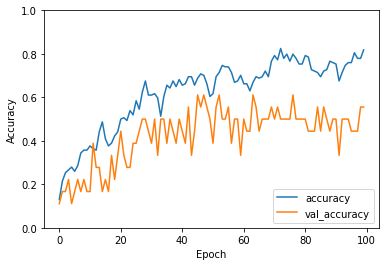

In [ ]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plot accuracy and see fluctuation that because lack of sample but convergence is good

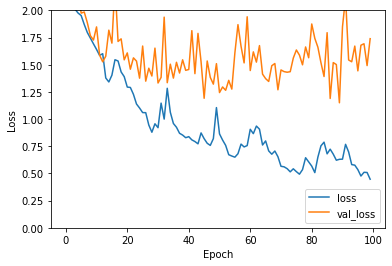

In [ ]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

decrase of loss is good.